# 第6章 Logistic Regression
本章实现LR回归模型，然后调用sklearn库函数中的linear_model.LogisticRegression

LR模型与最大熵模型均属于对数线性模型，

LR模型及最大熵模型学习可以将约束最优化的原始问题转换为无约束最优化的对偶问题：这里面需要引进拉格朗日乘子。

LR模型与最大熵模型学习一般采用极大似然估计，或正则化的极大似然估计。对偶函数的极大化等价于最大熵模型的极大似然估计。

模型最优化算法有：改进的迭代尺度法IIS（用到了Jensen不等式）、梯度下降法、牛顿法或拟牛顿法。其中牛顿法或拟牛顿法一般收敛速度较快。

当方程不收敛时，使用牛顿法求解其近似解，因为牛顿法恒收敛。

二项LR回归模型：$f(x)=\frac{e^{wx}}{1+e^{wx}}$

其中$wx$线性函数：$wx=bx_0+w_1*x_1+w_2*x_2+...+w_n*x_n, 其中x_0 = 1$

In [1]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# create data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0, 1, -1]])
    return data[:, :2], data[:, -1]

#split dataset
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
class LogisticRegressionClassifier:
    def __init__(self, max_iter=200, learning_rate=0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        
#     def sigmoid(self, x):
#         return 1 / (1 + exp(-x))
    
    # LR function 
    def lr_function(self, x):
        return exp(x) / (1 + exp(x))
    
    def data_matrix(self, X):
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d]) # add x_0 = 1
        return data_mat
    
    # train
    def fit(self, X, y):
        data_mat = self.data_matrix(X)
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)
        
        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                result = self.lr_function(np.dot(data_mat[i], self.weights))
                error = y[i] - result
                self.weights += self.learning_rate * error * np.transpose([data_mat[i]])
        print('LogisticRegression Model(Learning_rate={}, max_iter={})'.format(self.learning_rate, self.max_iter))
    
    def score(self, X_test, y_test):
        right_count = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y==0):
                right_count += 1
        return right_count / len(X_test)

In [4]:
lr_clf = LogisticRegressionClassifier()
lr_clf.fit(X_train, y_train)

LogisticRegression Model(Learning_rate=0.01, max_iter=200)


In [5]:
lr_clf.score(X_test, y_test)

1.0

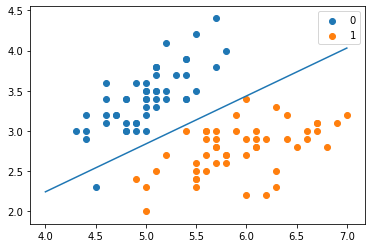

In [6]:
x_points = np.arange(4, 8)
y_points = -(lr_clf.weights[1] * x_points + lr_clf.weights[0]) / lr_clf.weights[2]
plt.plot(x_points, y_points)

#plot iris
plt.scatter(X[:50, 0], X[:50, 1], label='0')
plt.scatter(X[50:100, 0], X[50:100, 1], label='1')
plt.legend()

## sklearn.linear_model.LogisticRegression
solver参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是：
- a) liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。
- b) lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
- c) newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
- d) sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
clf = LogisticRegression(max_iter=200)

In [9]:
clf.fit(X_train, y_train)

/home/gpu/anaconda3/envs/myLearning_36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
clf.score(X_test, y_test)

0.95

In [11]:
print(clf.coef_, clf.intercept_)

[[ 1.99979562 -3.39541509]] [-0.45983646]


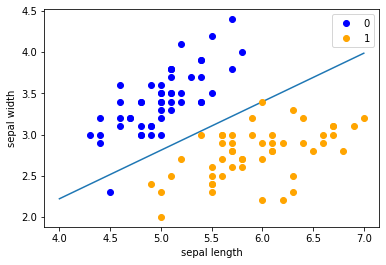

In [12]:
x_ponints = np.arange(4, 8)
y_points = -(clf.coef_[0][0] * x_points + clf.intercept_) / clf.coef_[0][1]
plt.plot(x_points, y_points)

# plot iris
plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
plt.plot(X[50:, 0], X[50:, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()